# WGAN Horse Training

In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
from models.GAN import build_generator, build_critic
from torchvision import datasets, transforms

bs = 128
z_dim = 100

transform = transforms.Compose([transforms.ToTensor()])
ds = datasets.CIFAR10(root='./data', download=True, transform=transform)
ds.targets = t.tensor(ds.targets)
idx = ds.targets == 7  # 7 is the label for horses
ds.targets = ds.targets[idx]
ds.data = ds.data[idx.numpy().astype(np.bool)]
dl = DataLoader(dataset=ds, batch_size=bs, shuffle=True, drop_last=True)

Files already downloaded and verified


In [2]:
def plot_tensor(x):
    _, ax = plt.subplots(figsize=(3, 3))
    def image2np(image):
        res = image.permute(1, 2, 0)
        return res[..., 0] if res.shape[2] == 1 else res
    ax.imshow(image2np(t.from_numpy(x.cpu().detach().numpy())), cmap="viridis", alpha=None)
    plt.show()

In [3]:
generator = build_generator(gen_init_size=(128, 4, 4), gen_upsample_flags=[True, True, True, False],
                            gen_c=[128, 64, 32, 3], gen_ks=[5, 5, 5, 5], gen_strides=[1, 1, 1, 1],
                            gen_pads=[2, 2, 2, 2], z_dim=z_dim, output_act=t.nn.Tanh, 
                            leaky_relu=True, first_gen_c=128)

critic = build_critic(ds[0][0][None], critic_c=[3, 32, 64, 128, 128], critic_ks=[5, 5, 5, 5],
                      critic_strides=[2, 2, 2, 1], critic_pads=[2, 2, 2, 2], wgan=True, leaky_relu=True)

g_opt = t.optim.RMSprop(generator.parameters(), lr=5e-5)
c_opt = t.optim.RMSprop(critic.parameters(), lr=5e-5)
device = t.device('cuda') if t.cuda.is_available() else 'cpu'
generator.cuda(device)
critic.cuda(device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.4)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (4): LeakyReLU(negative_slope=0.2)
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Dropout(p=0.4)
  (7): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (8): LeakyReLU(negative_slope=0.2)
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Dropout(p=0.4)
  (11): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (12): LeakyReLU(negative_slope=0.2)
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Dropout(p=0.4)
  (15): Flatten()
  (16): Linear(in_features=2048, out_features=1, bias=True)
)

  0%|          | 0/12000 [00:00<?, ?it/s]/home/p/.installed_software/anaconda3/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
  1%|          | 100/12000 [05:08<10:04:50,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.08996586501598358 -0.047341324388980865 0.14166073501110077
gen_imgs.mean 0.45774388313293457


  2%|▏         | 200/12000 [10:14<10:16:21,  3.13s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.08020076155662537 -0.05226001888513565 0.12244974821805954
gen_imgs.mean 0.46653109788894653


  2%|▎         | 300/12000 [15:20<9:51:12,  3.03s/it] 

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.08393855392932892 -0.057059481739997864 0.07831021398305893
gen_imgs.mean 0.4719371795654297


  3%|▎         | 400/12000 [20:23<9:48:24,  3.04s/it] 

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.07525461167097092 -0.04008696973323822 0.12553457915782928
gen_imgs.mean 0.4631131589412689


  4%|▍         | 500/12000 [25:28<9:39:42,  3.02s/it] 

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.024202944710850716 -0.07060792297124863 0.06444558501243591
gen_imgs.mean 0.46151766180992126


  5%|▌         | 600/12000 [30:31<9:33:56,  3.02s/it] 

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.06400828808546066 -0.011739307083189487 0.08050434291362762
gen_imgs.mean 0.4617008566856384


  6%|▌         | 700/12000 [35:38<10:04:13,  3.21s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03313614800572395 -0.07435403019189835 0.06897317618131638
gen_imgs.mean 0.46777233481407166


  7%|▋         | 800/12000 [40:45<9:25:50,  3.03s/it] 

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.0008977563120424747 -0.07989709079265594 0.05888156592845917
gen_imgs.mean 0.465684175491333


  8%|▊         | 900/12000 [45:49<9:20:59,  3.03s/it] 

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.0014652255922555923 -0.08714429289102554 0.037689194083213806
gen_imgs.mean 0.4744569659233093


  8%|▊         | 999/12000 [50:50<9:14:00,  3.02s/it] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03520442545413971 -0.04503607377409935 0.05924616754055023
gen_imgs.mean 0.4648718535900116


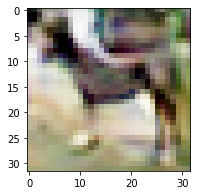

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


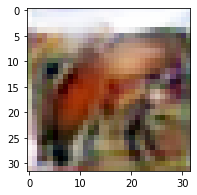

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


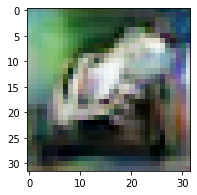

  9%|▉         | 1100/12000 [55:56<9:55:03,  3.28s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.036880526691675186 -0.05326002836227417 0.09265013039112091
gen_imgs.mean 0.46660733222961426


 10%|█         | 1200/12000 [1:01:00<9:07:28,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.005367569159716368 -0.08897556364536285 0.06396696716547012
gen_imgs.mean 0.46841105818748474


 11%|█         | 1300/12000 [1:06:06<9:03:27,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.05638543888926506 -0.029951633885502815 0.09165964275598526
gen_imgs.mean 0.45955026149749756


 12%|█▏        | 1400/12000 [1:11:09<8:54:49,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.0073172771371901035 -0.06609690934419632 0.023974347859621048
gen_imgs.mean 0.4703606367111206


 12%|█▎        | 1500/12000 [1:16:15<8:48:28,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.007617192342877388 -0.09684007614850998 0.01663091778755188
gen_imgs.mean 0.4720819890499115


 13%|█▎        | 1600/12000 [1:21:21<8:48:25,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.05063028633594513 -0.10843576490879059 0.01553542073816061
gen_imgs.mean 0.46021753549575806


 14%|█▍        | 1700/12000 [1:26:25<8:44:21,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.005094860680401325 -0.055441681295633316 0.043895214796066284
gen_imgs.mean 0.4656561017036438


 15%|█▌        | 1800/12000 [1:31:27<8:38:19,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.050303831696510315 -0.030268793925642967 0.09887729585170746
gen_imgs.mean 0.4634999930858612


 16%|█▌        | 1900/12000 [1:36:29<8:29:50,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0015906114131212234 -0.05672073736786842 0.03545389696955681
gen_imgs.mean 0.4713971018791199


 17%|█▋        | 1999/12000 [1:41:30<8:20:27,  3.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.05545973777770996 -0.00830682273954153 0.07281221449375153
gen_imgs.mean 0.4646250605583191


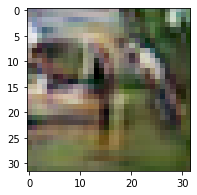

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


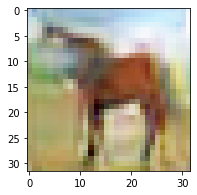

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


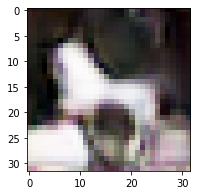

 18%|█▊        | 2100/12000 [1:46:39<8:20:31,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02995067834854126 -0.019153613597154617 0.008454700000584126
gen_imgs.mean 0.46218857169151306


 18%|█▊        | 2200/12000 [1:51:43<8:20:44,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.00041656545363366604 -0.0697510689496994 0.03711428493261337
gen_imgs.mean 0.4653418958187103


 19%|█▉        | 2300/12000 [1:56:49<8:16:59,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03677413985133171 -0.03296459838747978 0.016417251899838448
gen_imgs.mean 0.46846920251846313


 20%|██        | 2400/12000 [2:01:57<8:09:35,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.010257536545395851 -0.04953543469309807 0.04912066459655762
gen_imgs.mean 0.46396565437316895


 21%|██        | 2500/12000 [2:07:01<7:57:52,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.08727440237998962 0.017892993986606598 0.10061384737491608
gen_imgs.mean 0.46373891830444336


 22%|██▏       | 2600/12000 [2:12:04<7:55:50,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.030369244515895844 -0.03493635728955269 0.07220106571912766
gen_imgs.mean 0.4628511369228363


 22%|██▎       | 2700/12000 [2:17:09<7:48:41,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.015235072001814842 -0.05248366296291351 0.04428020119667053
gen_imgs.mean 0.4696338176727295


 23%|██▎       | 2800/12000 [2:22:16<7:48:40,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0081519465893507 -0.052034758031368256 0.016321245580911636
gen_imgs.mean 0.46381625533103943


 24%|██▍       | 2900/12000 [2:27:23<7:39:29,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.055283695459365845 -0.010396141558885574 0.0753137618303299
gen_imgs.mean 0.4599538743495941


 25%|██▍       | 2999/12000 [2:32:25<7:33:30,  3.02s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.012220792472362518 -0.0641164630651474 0.06410261243581772
gen_imgs.mean 0.46390652656555176


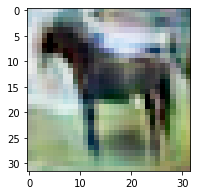

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


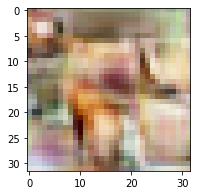

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


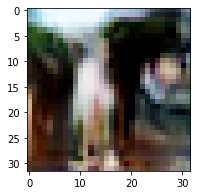

 26%|██▌       | 3100/12000 [2:37:38<7:52:51,  3.19s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.002498524496331811 -0.06764405965805054 0.04168661683797836
gen_imgs.mean 0.47338151931762695


 27%|██▋       | 3200/12000 [2:42:43<7:24:42,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.018907170742750168 -0.047685157507658005 0.07153502851724625
gen_imgs.mean 0.4689357280731201


 28%|██▊       | 3300/12000 [2:47:48<7:20:00,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.06947597861289978 0.022859662771224976 0.0789358988404274
gen_imgs.mean 0.4686150550842285


 28%|██▊       | 3400/12000 [2:52:51<7:14:26,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.008124801330268383 -0.06718215346336365 0.02421717718243599
gen_imgs.mean 0.4638507068157196


 29%|██▉       | 3500/12000 [2:57:54<7:11:11,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03140705078840256 -0.01164068840444088 0.08085578680038452
gen_imgs.mean 0.4659085273742676


 30%|███       | 3600/12000 [3:02:58<7:06:52,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.03348320350050926 -0.07944139093160629 0.05080718547105789
gen_imgs.mean 0.47067850828170776


 31%|███       | 3700/12000 [3:08:02<7:02:55,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03477197885513306 -0.028427790850400925 0.07839027792215347
gen_imgs.mean 0.4674418866634369


 32%|███▏      | 3800/12000 [3:13:08<6:58:07,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.005515861324965954 -0.06254743039608002 0.05056347697973251
gen_imgs.mean 0.4646446108818054


 32%|███▎      | 3900/12000 [3:18:12<6:54:11,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.026879820972681046 -0.05015713348984718 0.04673448204994202
gen_imgs.mean 0.4625251889228821


 33%|███▎      | 3999/12000 [3:23:14<6:42:13,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03217826783657074 -0.013668491505086422 0.03314321115612984
gen_imgs.mean 0.46510979533195496


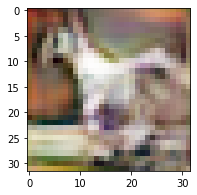

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


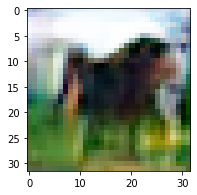

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


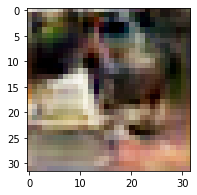

 34%|███▍      | 4100/12000 [3:28:24<6:42:50,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.01049075648188591 -0.03298107907176018 0.052899401634931564
gen_imgs.mean 0.4695844054222107


 35%|███▌      | 4200/12000 [3:33:29<6:38:26,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03198910132050514 -0.025025632232427597 0.06304821372032166
gen_imgs.mean 0.46508175134658813


 36%|███▌      | 4300/12000 [3:38:33<6:30:33,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.043452188372612 -0.019948534667491913 0.06731146574020386
gen_imgs.mean 0.467080295085907


 37%|███▋      | 4400/12000 [3:43:39<6:22:48,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.014548787847161293 -0.0574144646525383 0.07601208984851837
gen_imgs.mean 0.4632507264614105


 38%|███▊      | 4500/12000 [3:48:50<6:20:51,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.006383850239217281 -0.0656614750623703 0.03854114189743996
gen_imgs.mean 0.4623304307460785


 38%|███▊      | 4600/12000 [3:53:58<6:17:06,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0312783345580101 -0.052377961575984955 0.04429083317518234
gen_imgs.mean 0.46832454204559326


 39%|███▉      | 4700/12000 [3:59:03<6:29:57,  3.21s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02495190128684044 -0.03397838771343231 0.08441822230815887
gen_imgs.mean 0.46647679805755615


 40%|████      | 4800/12000 [4:04:09<6:04:21,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.016454853117465973 -0.07489921152591705 0.06737953424453735
gen_imgs.mean 0.46772727370262146


 41%|████      | 4900/12000 [4:09:11<6:00:37,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.002426616381853819 -0.04823368787765503 0.027504798024892807
gen_imgs.mean 0.4635281562805176


 42%|████▏     | 4999/12000 [4:14:12<5:56:04,  3.05s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.006387769244611263 -0.060256779193878174 0.07012110948562622
gen_imgs.mean 0.46888023614883423


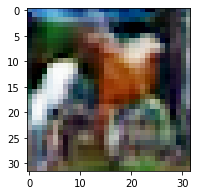

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


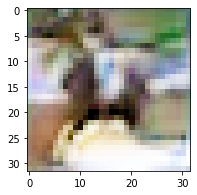

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


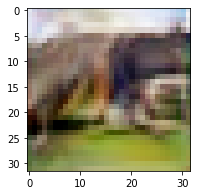

 42%|████▎     | 5100/12000 [4:19:23<5:55:40,  3.09s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.0044378736056387424 -0.06167544424533844 0.06462767720222473
gen_imgs.mean 0.4681699275970459


 43%|████▎     | 5200/12000 [4:24:32<5:47:44,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.05596540868282318 -0.006055266596376896 0.07421935349702835
gen_imgs.mean 0.4658535122871399


 44%|████▍     | 5300/12000 [4:29:38<5:39:24,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03369522839784622 -0.03833942487835884 0.02910400927066803
gen_imgs.mean 0.46815454959869385


 45%|████▌     | 5400/12000 [4:34:47<5:55:38,  3.23s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02061627060174942 -0.018087320029735565 0.04349461942911148
gen_imgs.mean 0.46555909514427185


 46%|████▌     | 5500/12000 [4:39:53<5:32:37,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0033055124804377556 -0.05906042456626892 0.015971196815371513
gen_imgs.mean 0.4637012481689453


 47%|████▋     | 5600/12000 [4:44:58<5:25:12,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.026341786608099937 -0.04254632443189621 0.08985714614391327
gen_imgs.mean 0.4707804322242737


 48%|████▊     | 5700/12000 [4:50:02<5:20:50,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.04216202348470688 -0.04443178325891495 0.060427386313676834
gen_imgs.mean 0.46612948179244995


 48%|████▊     | 5800/12000 [4:55:06<5:14:37,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.026912018656730652 -0.048537563532590866 0.02737792581319809
gen_imgs.mean 0.4665070176124573


 49%|████▉     | 5900/12000 [5:00:11<5:08:12,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.003532296046614647 -0.07122485339641571 0.05046042799949646
gen_imgs.mean 0.4634568691253662


 50%|████▉     | 5999/12000 [5:05:10<5:00:22,  3.00s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02033229172229767 -0.025989804416894913 0.01628934033215046
gen_imgs.mean 0.46281808614730835


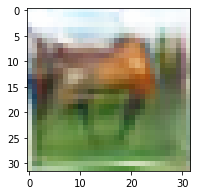

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


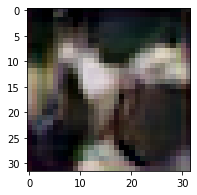

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


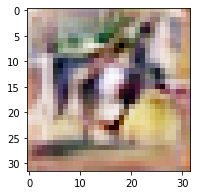

 51%|█████     | 6100/12000 [5:10:18<4:58:51,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0635150596499443 0.014438417740166187 0.0540640614926815
gen_imgs.mean 0.4705491065979004


 52%|█████▏    | 6200/12000 [5:15:21<4:53:45,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03158463537693024 -0.028736189007759094 0.025781258940696716
gen_imgs.mean 0.46351051330566406


 52%|█████▎    | 6300/12000 [5:20:24<4:47:33,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.00811070017516613 -0.0466257743537426 0.04883085936307907
gen_imgs.mean 0.46576008200645447


 53%|█████▎    | 6400/12000 [5:25:30<4:55:12,  3.16s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.01706499606370926 -0.0639447346329689 0.029139520600438118
gen_imgs.mean 0.46530184149742126


 54%|█████▍    | 6500/12000 [5:30:37<4:39:38,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.05827535688877106 -0.013938076794147491 0.05963161587715149
gen_imgs.mean 0.46324193477630615


 55%|█████▌    | 6600/12000 [5:35:45<4:32:24,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.023584958165884018 -0.04039771109819412 0.04742307960987091
gen_imgs.mean 0.46901464462280273


 56%|█████▌    | 6700/12000 [5:40:48<4:27:12,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.05757440999150276 -0.03045307844877243 0.04665646702051163
gen_imgs.mean 0.46474742889404297


 57%|█████▋    | 6800/12000 [5:45:53<4:25:21,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.008958575315773487 -0.05796854943037033 0.03618098050355911
gen_imgs.mean 0.46452391147613525


 57%|█████▊    | 6900/12000 [5:50:58<4:19:20,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.038843151181936264 -0.026032987982034683 0.05699191987514496
gen_imgs.mean 0.4654899537563324


 58%|█████▊    | 6999/12000 [5:55:59<4:13:25,  3.04s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0222290251404047 -0.02025645598769188 0.01323558110743761
gen_imgs.mean 0.46498048305511475


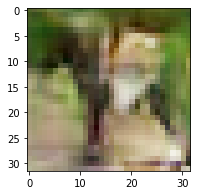

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


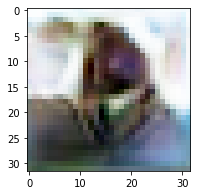

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


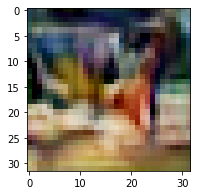

 59%|█████▉    | 7100/12000 [6:01:08<4:08:59,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.002944235224276781 -0.04501693695783615 0.03484257683157921
gen_imgs.mean 0.466913640499115


 60%|██████    | 7200/12000 [6:06:11<4:04:18,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.021935326978564262 -0.025204092264175415 0.025847110897302628
gen_imgs.mean 0.4609273672103882


 61%|██████    | 7300/12000 [6:11:18<3:55:57,  3.01s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.036265432834625244 -0.030588656663894653 0.032263755798339844
gen_imgs.mean 0.4677545428276062


 62%|██████▏   | 7400/12000 [6:16:27<4:03:18,  3.17s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.00959406141191721 -0.07301812618970871 0.026071056723594666
gen_imgs.mean 0.4674316346645355


 62%|██████▎   | 7500/12000 [6:21:32<3:53:33,  3.11s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.011828131973743439 -0.02558360993862152 0.027179604396224022
gen_imgs.mean 0.4619220197200775


 63%|██████▎   | 7600/12000 [6:26:38<3:44:50,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03225094825029373 -0.02386529929935932 0.01056681852787733
gen_imgs.mean 0.4631762206554413


 64%|██████▍   | 7700/12000 [6:31:45<3:38:35,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.012481573969125748 -0.05556647107005119 0.04865887016057968
gen_imgs.mean 0.469479501247406


 65%|██████▌   | 7800/12000 [6:36:49<3:33:11,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.0018354484345763922 -0.0587601475417614 0.041957657784223557
gen_imgs.mean 0.46179279685020447


 66%|██████▌   | 7900/12000 [6:41:53<3:27:38,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.027303606271743774 -0.05019494518637657 0.017468981444835663
gen_imgs.mean 0.4651910662651062


 67%|██████▋   | 7999/12000 [6:46:59<3:24:37,  3.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02722887322306633 -0.03956994414329529 0.05073058232665062
gen_imgs.mean 0.4698219299316406


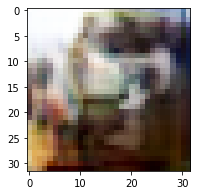

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


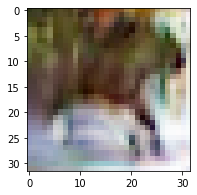

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


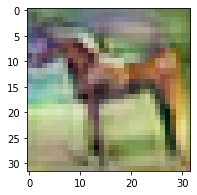

 68%|██████▊   | 8100/12000 [6:52:07<3:16:26,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03831042721867561 -0.041904691606760025 0.06348445266485214
gen_imgs.mean 0.4693276286125183


 68%|██████▊   | 8200/12000 [6:57:13<3:13:04,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.017091920599341393 -0.05215686559677124 0.05199699103832245
gen_imgs.mean 0.46518629789352417


 69%|██████▉   | 8300/12000 [7:02:16<3:08:40,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.032980576157569885 -0.05763408914208412 0.03720521181821823
gen_imgs.mean 0.46465104818344116


 70%|███████   | 8400/12000 [7:07:21<3:02:54,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.015162385068833828 -0.06263493746519089 0.037846051156520844
gen_imgs.mean 0.4662405848503113


 71%|███████   | 8500/12000 [7:12:24<2:56:29,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0332280695438385 -0.0519314706325531 0.05270325392484665
gen_imgs.mean 0.4660720229148865


 72%|███████▏  | 8600/12000 [7:17:26<2:52:26,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.05299679934978485 -0.007328640669584274 0.08143793046474457
gen_imgs.mean 0.4676799774169922


 72%|███████▎  | 8700/12000 [7:22:31<2:46:06,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.04375810921192169 -0.030583815649151802 0.03936494141817093
gen_imgs.mean 0.4674837291240692


 73%|███████▎  | 8800/12000 [7:27:38<2:42:10,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.03046143800020218 -0.04791726917028427 0.0641246885061264
gen_imgs.mean 0.4695182740688324


 74%|███████▍  | 8900/12000 [7:32:43<2:37:44,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.003479274921119213 -0.04956168681383133 0.05324667692184448
gen_imgs.mean 0.46828562021255493


 75%|███████▍  | 8999/12000 [7:37:43<2:30:43,  3.01s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.025975149124860764 -0.019836146384477615 0.08984681218862534
gen_imgs.mean 0.4642788767814636


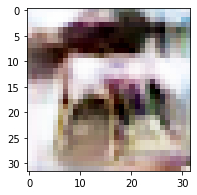

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


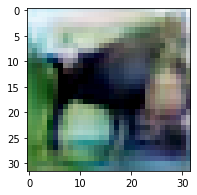

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


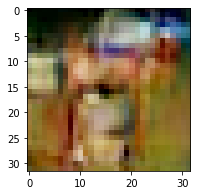

 76%|███████▌  | 9100/12000 [7:42:49<2:27:28,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.013370276428759098 -0.07032689452171326 0.019896389916539192
gen_imgs.mean 0.46596890687942505


 77%|███████▋  | 9200/12000 [7:47:52<2:20:50,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.020568879321217537 -0.06147242337465286 0.039850957691669464
gen_imgs.mean 0.4672893285751343


 78%|███████▊  | 9300/12000 [7:52:57<2:16:37,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.029060829430818558 -0.04377158731222153 0.05583301931619644
gen_imgs.mean 0.4700668752193451


 78%|███████▊  | 9400/12000 [7:58:01<2:12:52,  3.07s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.004457790404558182 -0.07097277790307999 0.047657646238803864
gen_imgs.mean 0.47014057636260986


 79%|███████▉  | 9500/12000 [8:03:06<2:06:29,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.010563511401414871 -0.04057137295603752 0.05396250635385513
gen_imgs.mean 0.4668115973472595


 80%|████████  | 9600/12000 [8:08:08<2:00:59,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.015503671020269394 -0.05511099472641945 0.0122295543551445
gen_imgs.mean 0.46340319514274597


 81%|████████  | 9700/12000 [8:13:11<1:56:37,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.04305802658200264 -0.02312442846596241 0.06715657562017441
gen_imgs.mean 0.46673649549484253


 82%|████████▏ | 9800/12000 [8:18:16<1:50:52,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.012068257667124271 -0.035277362912893295 0.025819458067417145
gen_imgs.mean 0.4682740569114685


 82%|████████▎ | 9900/12000 [8:23:22<1:47:50,  3.08s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02172965370118618 -0.038560204207897186 0.04205422103404999
gen_imgs.mean 0.4628715515136719


 83%|████████▎ | 9999/12000 [8:28:23<1:41:52,  3.05s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.031565405428409576 -0.06329628825187683 0.02770078182220459
gen_imgs.mean 0.4698084592819214


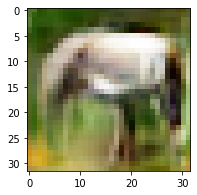

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


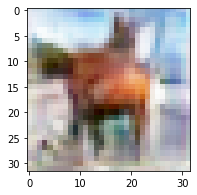

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


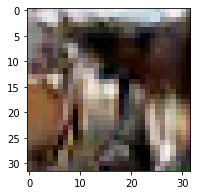

 84%|████████▍ | 10100/12000 [8:33:28<1:35:49,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.01067162211984396 -0.035079143941402435 0.04182063043117523
gen_imgs.mean 0.46504050493240356


 85%|████████▌ | 10200/12000 [8:38:33<1:31:16,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.0062630996108055115 -0.05730415880680084 0.04802761226892471
gen_imgs.mean 0.47346100211143494


 86%|████████▌ | 10300/12000 [8:43:36<1:25:39,  3.02s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.005590924993157387 -0.04305866360664368 0.03726928308606148
gen_imgs.mean 0.46804279088974


 87%|████████▋ | 10400/12000 [8:48:38<1:20:48,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.013489264994859695 -0.021582478657364845 0.03437265753746033
gen_imgs.mean 0.46503743529319763


 88%|████████▊ | 10500/12000 [8:53:42<1:17:39,  3.11s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.006425923202186823 -0.030460458248853683 0.006330698262900114
gen_imgs.mean 0.4597504734992981


 88%|████████▊ | 10600/12000 [8:58:45<1:11:54,  3.08s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.012597919441759586 -0.04552415758371353 0.039260830730199814
gen_imgs.mean 0.46669620275497437


 89%|████████▉ | 10700/12000 [9:03:52<1:07:32,  3.12s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.01210830919444561 -0.05689021944999695 0.060676656663417816
gen_imgs.mean 0.4616939425468445


 90%|█████████ | 10800/12000 [9:08:56<1:00:40,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.013785630464553833 -0.04134773835539818 0.0532836951315403
gen_imgs.mean 0.46502405405044556


 91%|█████████ | 10900/12000 [9:14:03<55:57,  3.05s/it]  

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.010696999728679657 -0.05325273051857948 0.024496428668498993
gen_imgs.mean 0.460718035697937


 92%|█████████▏| 10999/12000 [9:19:07<50:29,  3.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.025265660136938095 -0.048382364213466644 0.034355372190475464
gen_imgs.mean 0.4655207097530365


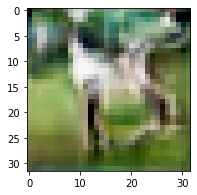

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


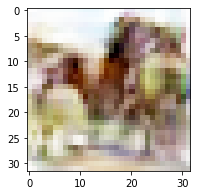

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


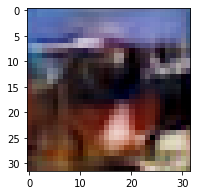

 92%|█████████▎| 11100/12000 [9:24:15<49:51,  3.32s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.016583183780312538 -0.06951490044593811 0.021266750991344452
gen_imgs.mean 0.4695119261741638


 93%|█████████▎| 11200/12000 [9:29:20<40:42,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.01966857723891735 -0.06366699188947678 0.0457640178501606
gen_imgs.mean 0.47464412450790405


 94%|█████████▍| 11300/12000 [9:34:25<35:27,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02274242229759693 -0.0781189501285553 0.04306270554661751
gen_imgs.mean 0.46650251746177673


 95%|█████████▌| 11400/12000 [9:39:33<30:33,  3.06s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.010916903614997864 -0.05608580261468887 0.0355733223259449
gen_imgs.mean 0.46471700072288513


 96%|█████████▌| 11500/12000 [9:44:38<25:25,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.007861430756747723 -0.041074488312006 0.04980313777923584
gen_imgs.mean 0.4717915654182434


 97%|█████████▋| 11600/12000 [9:49:42<20:17,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.003600078634917736 -0.05118304863572121 0.020463228225708008
gen_imgs.mean 0.46514007449150085


 98%|█████████▊| 11700/12000 [9:54:45<15:11,  3.04s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.04324229806661606 -0.04115341603755951 -0.009917104616761208
gen_imgs.mean 0.46633291244506836


 98%|█████████▊| 11800/12000 [9:59:50<10:06,  3.03s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) 0.0011308398097753525 -0.06693989038467407 0.014361164532601833
gen_imgs.mean 0.46394217014312744


 99%|█████████▉| 11900/12000 [10:04:55<05:04,  3.05s/it]

-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.023788832128047943 -0.03997358679771423 0.039204586297273636
gen_imgs.mean 0.46472617983818054


100%|█████████▉| 11999/12000 [10:09:56<00:03,  3.02s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred) -0.02750680409371853 -0.05895908921957016 0.050397854298353195
gen_imgs.mean 0.4641554057598114


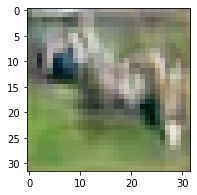

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


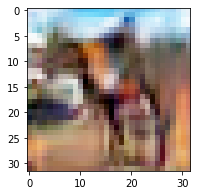

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


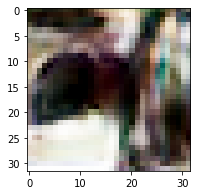

100%|██████████| 12000/12000 [10:10:00<00:00,  3.16s/it]


In [4]:
for epoch in tqdm(range(1, 12001)):
    if epoch % 6001 == 0:
        g_opt = t.optim.RMSprop(generator.parameters(), lr=4e-5)
        c_opt = t.optim.RMSprop(critic.parameters(), lr=4e-5)

    for i, (imgs, _) in enumerate(dl):
        # train critic
        real_imgs = imgs.to(device)
        randn = t.randn(bs, z_dim)
        gen_imgs = generator(randn.to(device))

        c_opt.zero_grad()
        ri_pred = critic(real_imgs)
        gi_pred = critic(gen_imgs)
        c_loss = (-t.mean(ri_pred) + t.mean(gi_pred)) / 2
        c_loss.backward()
        c_opt.step()

        # clip discriminator weights
        for p in critic.parameters():
            p.data.clamp_(-.01, .01)

        # train generator
        if i % 3 == 0:
            gen_imgs = generator(randn.to(device))
            g_opt.zero_grad()
            gi_critic_pred = critic(gen_imgs)
            g_loss = -t.mean(gi_critic_pred)
            g_loss.backward()
            g_opt.step()

    if epoch % 100 == 0:
        print('-t.mean(ri_pred), t.mean(gi_pred), -t.mean(gi_critic_pred)', -t.mean(ri_pred).item(), t.mean(gi_pred).item(), -t.mean(gi_critic_pred).item())
        print('gen_imgs.mean', gen_imgs.mean().item())

    if epoch % 1000 == 0:
        for img in generator(t.randn(3, z_dim).to(device)):
            plot_tensor(img)


In [5]:
t.save(generator.state_dict(), 'models/state_dicts/04_02_horse_gen.pth')
t.save(critic.state_dict(), 'models/state_dicts/04_02_horse_critic.pth')